In [33]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
df=pd.read_csv(r"C:\Users\evilk\Downloads\income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


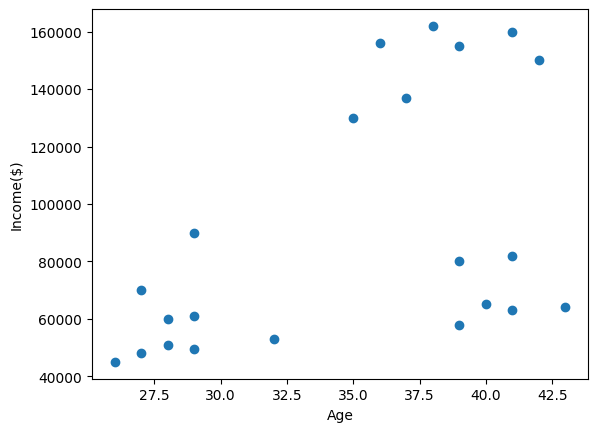

In [35]:
plt.scatter(x='Age',y='Income($)',data=df)
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.show()

In [36]:
Km=KMeans(n_clusters=3)

In [37]:
y_predict=Km.fit_predict(df[['Age',"Income($)"]])
y_predict

array([1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1],
      dtype=int32)

In [38]:
df['Cluster']=y_predict
df.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,1
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


In [39]:
Km.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.24166667e+01, 5.72916667e+04],
       [3.63333333e+01, 8.40000000e+04]])

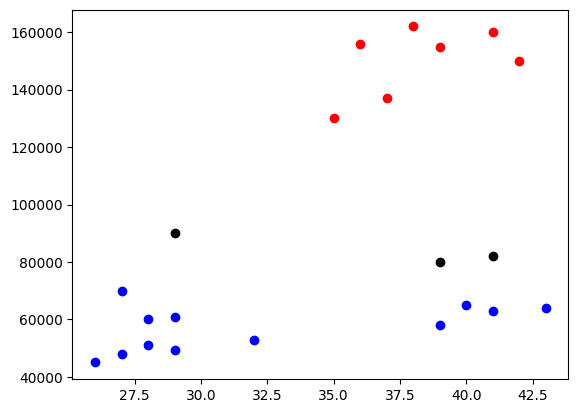

In [40]:
df0=df[df.Cluster==0]
df1=df[df.Cluster==1]
df2=df[df.Cluster==2]
plt.scatter(df0["Age"],df0["Income($)"],color="red")
plt.scatter(df1["Age"],df1["Income($)"],color="blue")
plt.scatter(df2["Age"],df2["Income($)"],color="black")

Preprocessing the data


In [41]:
scaler=MinMaxScaler()


In [42]:
scaler.fit(df[["Income($)"]])
df["Income($)"]=scaler.transform(df[["Income($)"]])

scaler.fit(df[["Age"]])
df["Age"]=scaler.transform(df[["Age"]])

In [43]:
df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [46]:
y_predict=Km.fit_predict(df[['Age',"Income($)"]])
y_predict

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [48]:
df['Cluster']=y_predict
df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


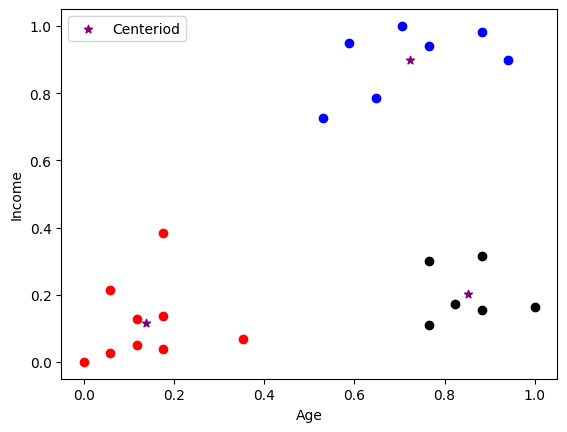

In [50]:
df0=df[df.Cluster==0]
df1=df[df.Cluster==1]
df2=df[df.Cluster==2]
plt.xlabel("Age")
plt.ylabel("Income")
plt.scatter(df0["Age"],df0["Income($)"],color="red")
plt.scatter(df1["Age"],df1["Income($)"],color="blue")
plt.scatter(df2["Age"],df2["Income($)"],color="black")
plt.scatter(Km.cluster_centers_[:,0],Km.cluster_centers_[:,1],color="purple",marker="*",label="Centeriod")
plt.legend()
plt.show()

In [61]:
sse=[]
k_rng=range(1,15)
for i in k_rng:
    Km=KMeans(n_clusters=i)
    Km.fit(df[['Age','Income($)']])
    sse.append(Km.inertia_)

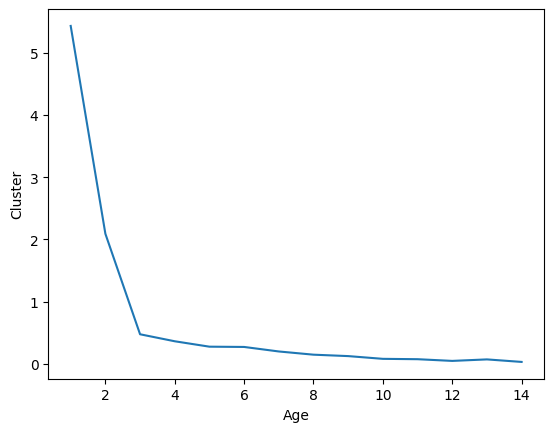

In [62]:
plt.plot(k_rng,sse)
plt.xlabel("Age")
plt.ylabel("Cluster")
plt.show()